In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R


In [16]:
Thumb = [-0.0238, -0.0122,  0.0181]
Index = [-0.0974, -0.0036,  0.0261]
Middle = [-0.0942, -0.0032,  0.0027]
Ring = [-0.0912, -0.0044, -0.0183]
Pinky = [-0.08,   -0.0053, -0.0365]

avp_datas = [Thumb, Index, Middle, Ring, Pinky]

Thumb = [-0.0175, -0.0160,  0.032]
Index = [-0.0772, -0.0224,  0.0263]
Middle = [-0.0775, -0.0207,  0.0012]
Ring = [-0.07392, -0.0211, -0.022]
Pinky = [-0.0618,  -0.0231, -0.0438]

robot_temp = [Thumb, Index, Middle, Ring, Pinky]


names = ["T", "I", "M", "R", "P"]
colors = ["k", "r", "b", "g", "y"]

In [19]:
# Apply z axis rotation to all elements
hand_rotate = R.from_euler("z", 15, degrees=True)
hand_rotate_m = hand_rotate.as_matrix()

robot_datas = []

for vector in robot_temp:
    robot_datas.append(np.matmul(vector, hand_rotate_m))

(-0.012813190569563083,
 0.0006770019608247274,
 0.01722704701578398,
 0.10121775966591505)

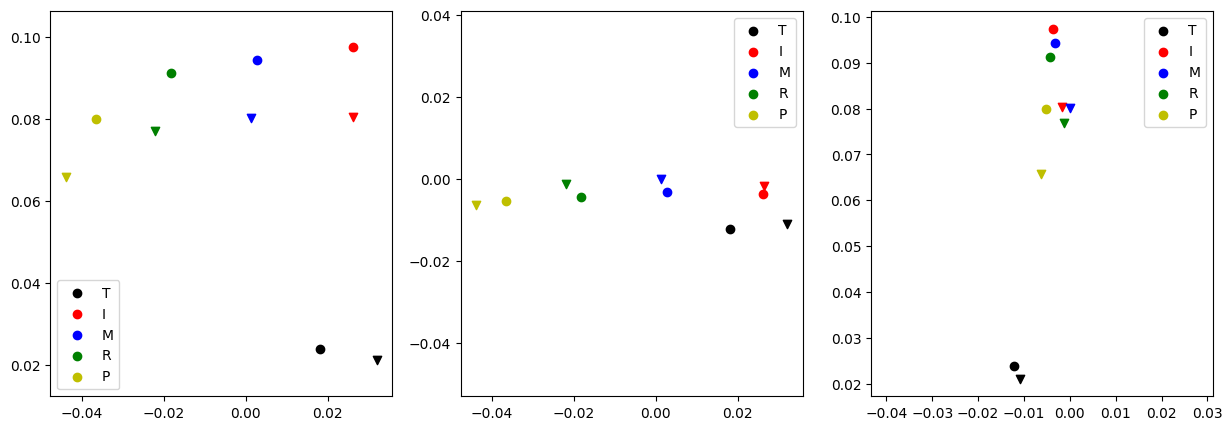

In [20]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

axs = ax[0]
for avp, robot, name, color in zip(avp_datas, robot_datas, names, colors):
    axs.scatter(avp[2], -avp[0], label = name, marker = 'o', color = color)
    axs.scatter(robot[2], -robot[0], marker = 'v', color = color)
axs.legend()

axs = ax[1]
for avp, robot, name, color in zip(avp_datas, robot_datas, names, colors):
    axs.scatter(avp[2], avp[1], label = name, marker = "o", color = color)
    axs.scatter(robot[2], robot[1], marker = "v", color = color)
axs.legend()

axs = ax[2]
for avp, robot, name, color in zip(avp_datas, robot_datas, names, colors):
    axs.scatter(avp[1], -avp[0], label = name, marker = "o", color = color)
    axs.scatter(robot[1], -robot[0], marker = "v", color = color)
axs.legend()

ax[0].axis('equal')
ax[1].axis('equal')
ax[2].axis('equal')

# Test cmc estimation code

In [23]:
thumb_measurement = [-1, -1, 0]

hand_rotate = R.from_euler("z", -15, degrees=True)
hand_rotate_m = hand_rotate.as_matrix()

cmc1_rot = R.from_euler("y", 10.5, degrees=True)
cmc1_rot_m = cmc1_rot.as_matrix()

# cmc1_aligned: measured point in the frame aligned to CMC1
hand_aligned = np.matmul(thumb_measurement, hand_rotate_m)
cmc1_aligned = np.matmul(hand_aligned, cmc1_rot_m)

# project cmc1_aligned to y-z plane
cmc1_projected = np.array([0, cmc1_aligned[1], cmc1_aligned[2]])

# Get angle of CMC1: z as the 'x' axis and -y as the 'y' axis
cmc1 = np.degrees(np.arctan2(-cmc1_projected[1], cmc1_projected[2]))

cmc2_rot = R.from_euler("x", cmc1, degrees=True)
cmc2_rot_m = cmc2_rot.as_matrix()

cmc2_aligned = np.matmul(cmc1_aligned, cmc2_rot_m)

# Get angle of CMC2: z as the 'x' axis and -x as the 'y' axis
cmc2 = np.degrees(np.arctan2(-cmc2_aligned[0], cmc2_aligned[2]))

print(cmc1, cmc2)

96.00620495197954 29.447605625756662
